In [1]:
import numpy as np
%matplotlib inline
import os

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

from astropy.io import fits
from astropy import units as u
from IPython.display import Image
import fsps
import sedpy
import prospect
import specutils
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

In [2]:
hdul = fits.open('../data/keck_data/msk13_coadd.fits')

In [3]:
info = hdul.info()
hdr = hdul[0].header
data = hdul[1].data

Filename: ../data/keck_data/msk13_coadd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (2222,)   uint8   
  1  /Users/yifei/Dropbox/Keck_Data/data4kate_reduced/MSK13_new/keck_d...    1 BinTableHDU     20   8184R x 4C   [D, D, D, K]   


In [4]:
w = data['wave']
f = data['flux']

Text(0, 0.5, 'flux')

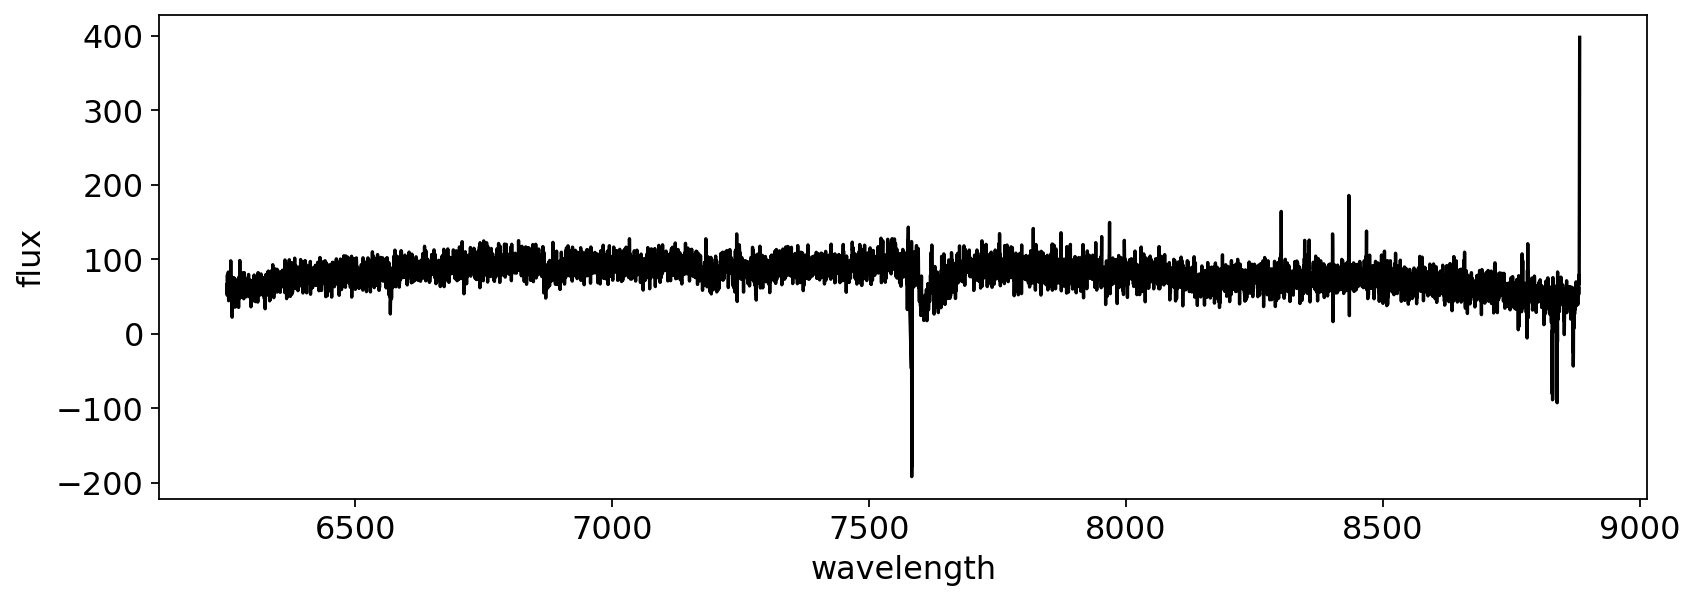

In [5]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')

(7500, 7700)

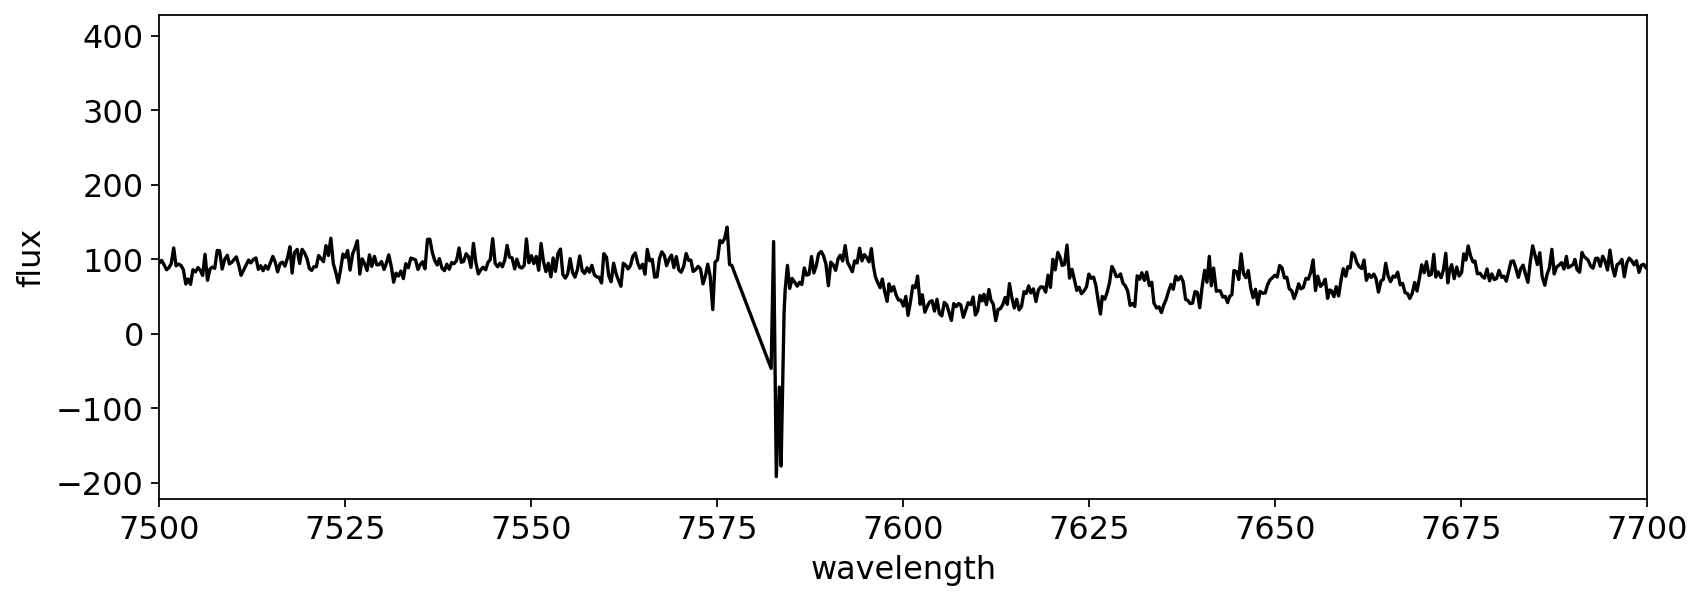

In [6]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(7500, 7700)

In [7]:
hdul = fits.open('../data/keck_data/sec2face_coadd_det7.fits')

In [8]:
info = hdul.info()
hdr = hdul[0].header
data = hdul[1].data

Filename: ../data/keck_data/sec2face_coadd_det7.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1                1 BinTableHDU     30   4072R x 4C   [1D, 1D, 1D, 1K]   


In [9]:
w = data['wave']
f = data['flux']

Text(0, 0.5, 'flux')

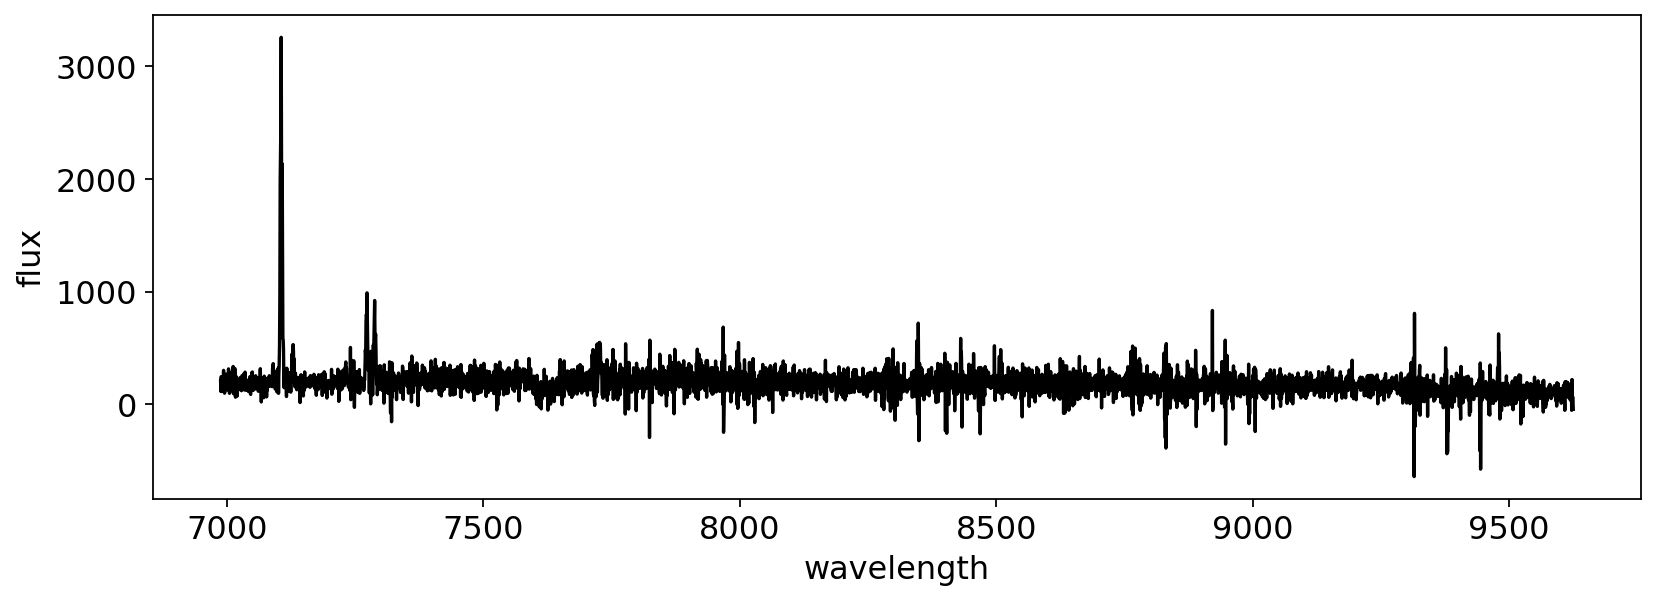

In [10]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')

(7000, 7400)

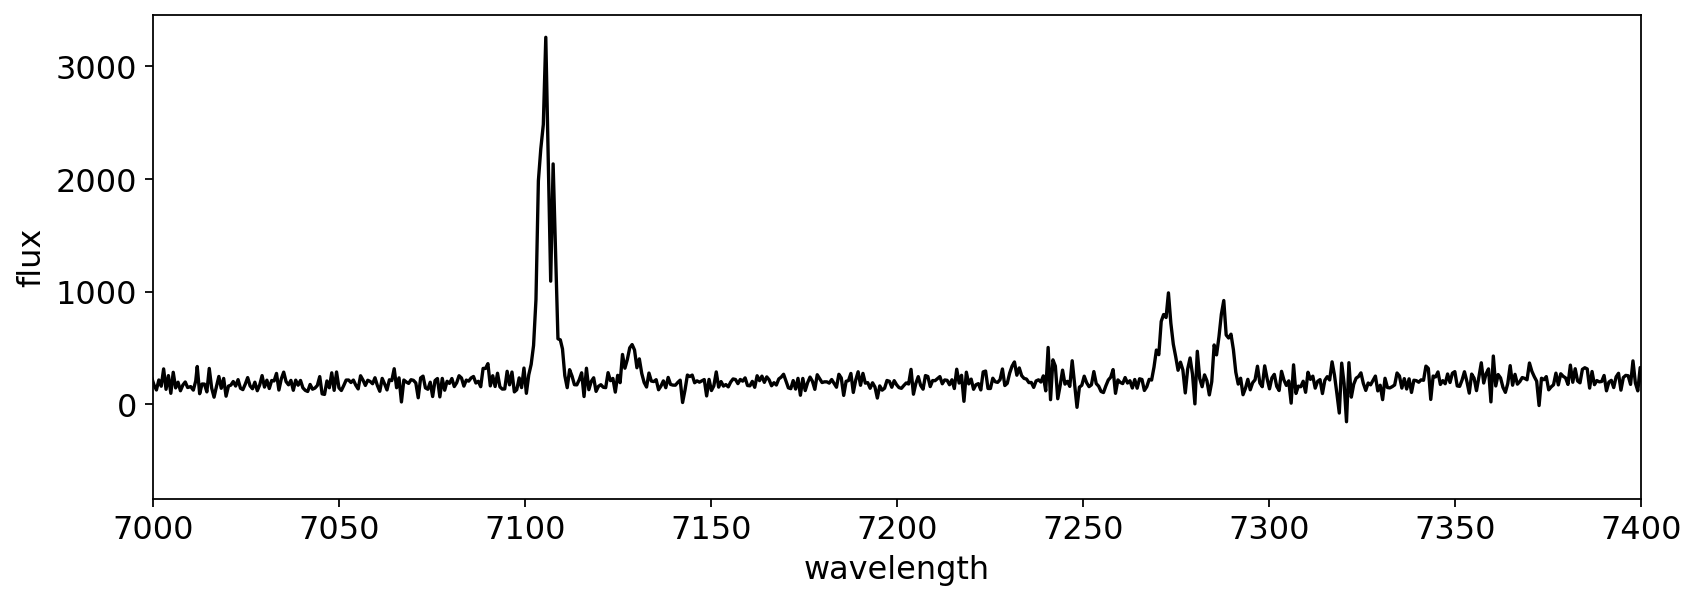

In [11]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(7000, 7400)

In [13]:
wave = w*u.AA
flux = f * u.Unit('erg cm-2 s-1 AA-1') #??
spec = Spectrum1D(spectral_axis=wave, flux=flux) 

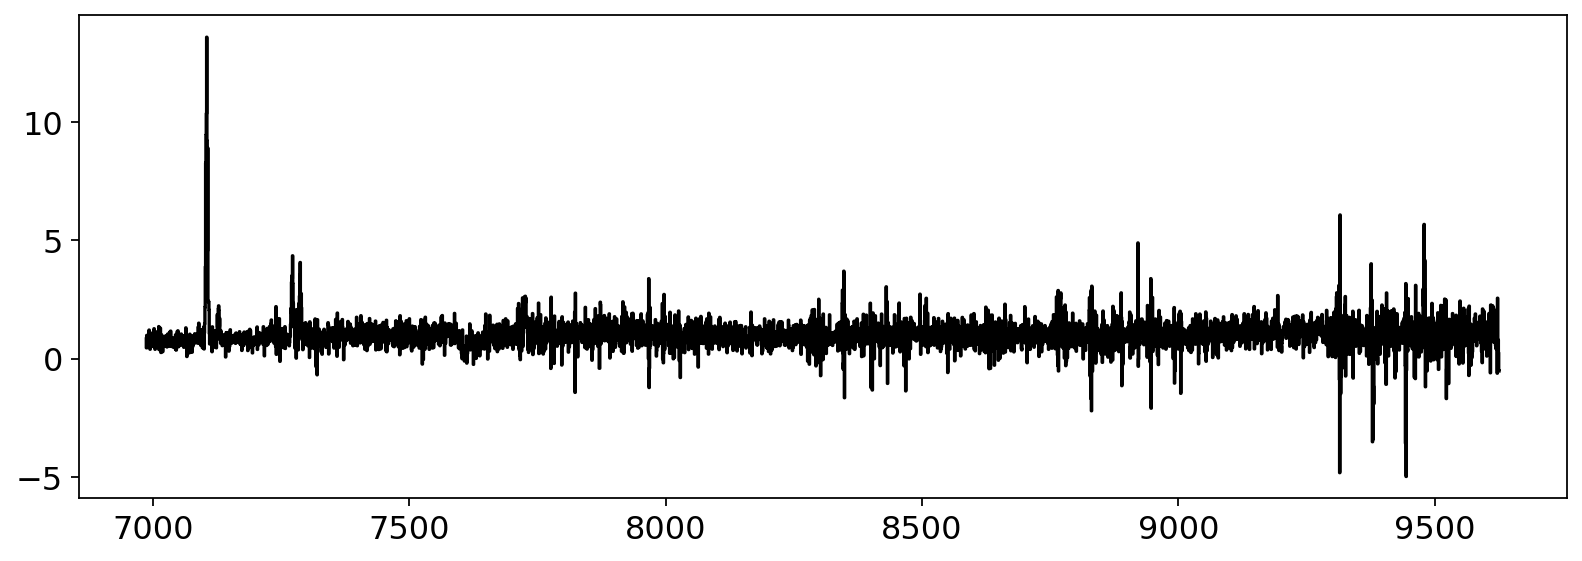

In [14]:
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 
plt.figure(figsize=(12,4))
plt.step(cont_norm_spec.wavelength, cont_norm_spec.flux, color='black')  

In [16]:
from specutils.analysis import centroid
halpha = centroid(cont_norm_spec, SpectralRegion(7090*u.AA, 7120*u.AA))  
print(halpha)

7105.21041024186 Angstrom


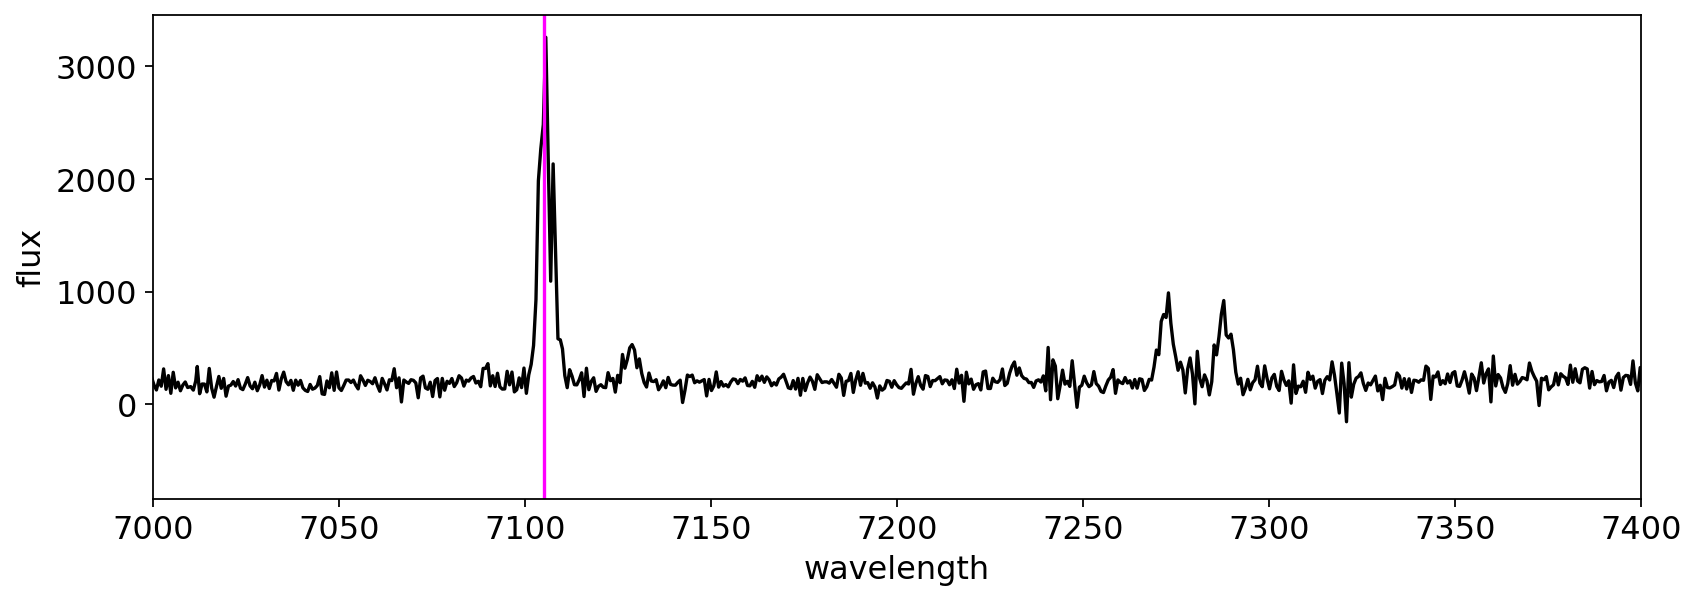

In [19]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(7000, 7400)
plt.axvline(halpha.value, color='magenta')

In [20]:
line_dict = {'Halpha':6564.61, 'Hbeta':4862.68, 'OIIIa':4364.436, 'OIIIb':4932.603, 'OIIIc':4960.295, 
             'OIIId':5008.240, 'NIIa':6549.86, 'NIIb':6585.27, 'SIIa':6718.29, 'SIIb':6732.67}

In [22]:
z = halpha.value/line_dict['Halpha'] - 1
print(z)

0.08235072765051688


In [23]:
wavecorr = wave / (1+z)
fluxcorr = cont_norm_spec.flux
speccorr = Spectrum1D(spectral_axis=wavecorr, flux=fluxcorr, redshift=z)

(6500, 6800)

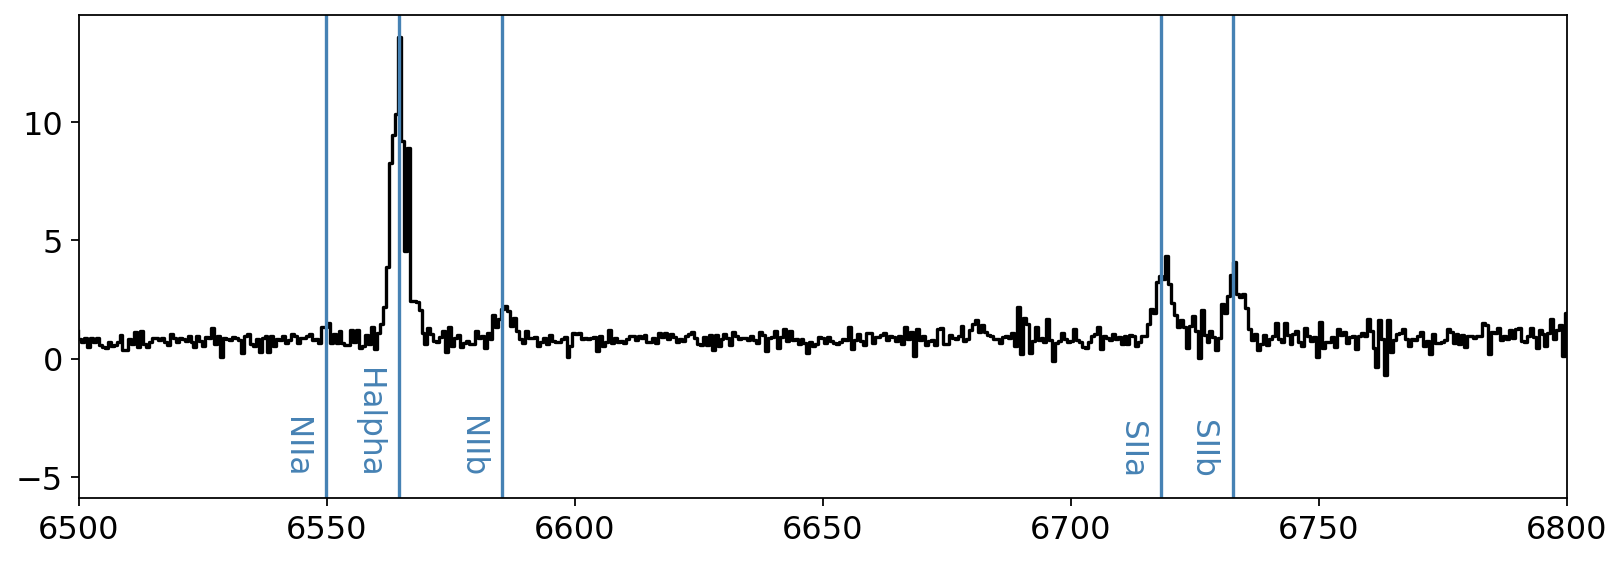

In [28]:
plt.figure(figsize=(12,4))
plt.step(speccorr.wavelength, speccorr.flux, color='black') 
xmin, xmax = 6500,6800
for line in line_dict:
    wline = line_dict[line]
    if xmin<wline<xmax:
        plt.axvline(wline, color='steelblue')
        plt.text(wline-3, -5, line, {'color': 'steelblue', 'fontsize': 14},
             horizontalalignment='right',
             verticalalignment='bottom',
             rotation=270)
plt.xlim(xmin, xmax)

(6530, 6630)

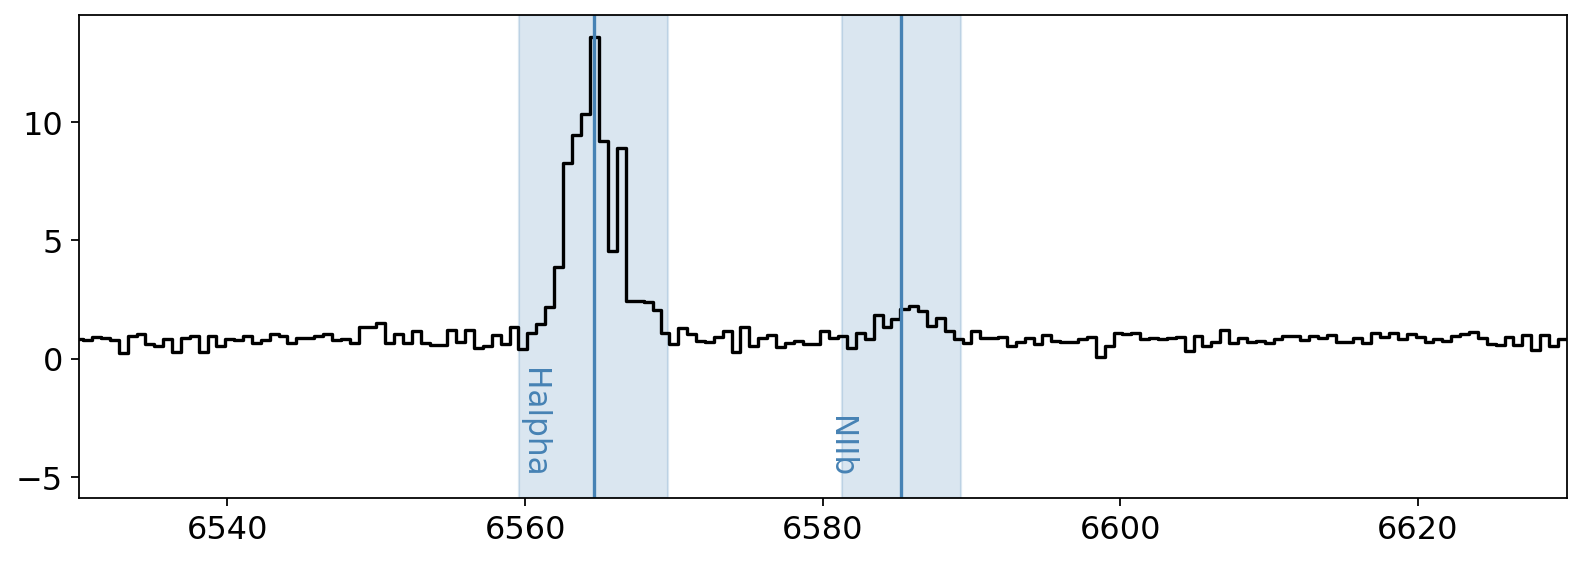

In [32]:
plt.figure(figsize=(12,4))
plt.step(speccorr.wavelength, speccorr.flux, color='black') 
xmin, xmax = 6530,6630
widths = [10, 8]
for i, line in enumerate(['Halpha', 'NIIb']):
    wline = line_dict[line]
    if xmin<wline<xmax:
        plt.axvline(wline, color='steelblue')
        width = widths[i]
        plt.axvspan(wline-width/2, wline+width/2, alpha=0.2, color='steelblue')
        plt.text(wline-3, -5, line, {'color': 'steelblue', 'fontsize': 14},
             horizontalalignment='right',
             verticalalignment='bottom',
             rotation=270)
plt.xlim(xmin, xmax)

In [35]:
from specutils.analysis import line_flux
from specutils.analysis import equivalent_width

line = 'Halpha'
region_width = 12.0
wmin = (line_dict[line]-region_width/2)*u.AA
wmax = (line_dict[line]+region_width/2)*u.AA
flux_halpha = line_flux(speccorr, SpectralRegion(wmin, wmax))
ew_halpha = equivalent_width(speccorr, regions=SpectralRegion(wmin, wmax))

line = 'NIIb'
region_width = 8.0
wmin = (line_dict[line]-region_width/2)*u.AA
wmax = (line_dict[line]+region_width/2)*u.AA
flux_nII = line_flux(speccorr, SpectralRegion(wmin, wmax))
ew_nII = equivalent_width(speccorr, regions=SpectralRegion(wmin, wmax))

In [36]:
print(flux_halpha, flux_nII)
print(ew_halpha, ew_nII)

51.68431442995415 Angstrom 10.605452562558789 Angstrom
-40.34448998146353 Angstrom -3.435381941629352 Angstrom


Text(-1.5, 0, 'star-forming')

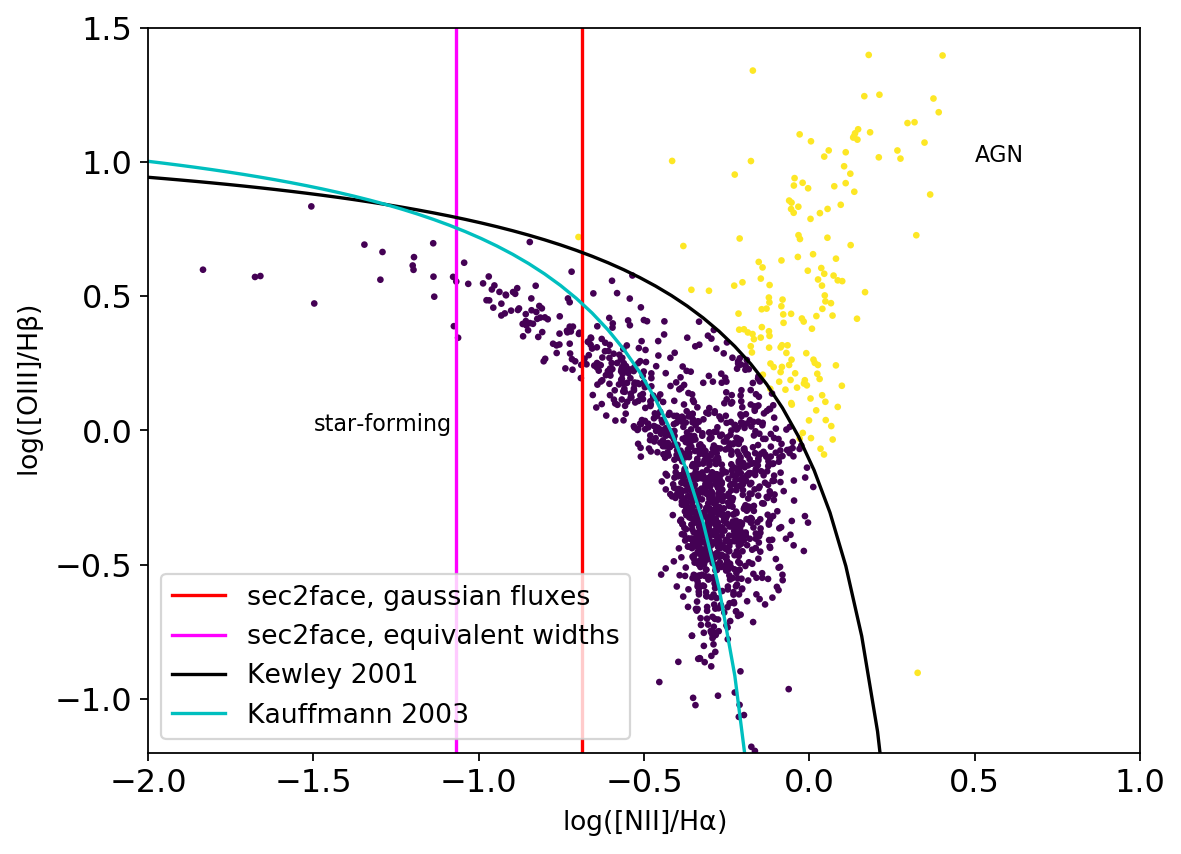

In [37]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

plt.figure(figsize=(8,6))
plt.axvline(np.log10(flux_nII/flux_halpha),
         color='red', markersize=20, label='sec2face, gaussian fluxes')
plt.axvline(np.log10(ew_nII/ew_halpha),
         color='magenta', markersize=20, label='sec2face, equivalent widths')

data = fetch_sdss_corrected_spectra()

i = np.where((data['lineindex_cln'] == 4) | (data['lineindex_cln'] == 5))

plt.scatter(data['log_NII_Ha'][i], data['log_OIII_Hb'][i],
            c=data['lineindex_cln'][i], s=9, lw=0)

NII = np.linspace(-2.0, 0.35)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k', label='Kewley 2001')
#plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
#plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')

ka03 = 0.61/(NII-0.05) + 1.3
idx = [i for i in range(len(NII)) if NII[i]<0 ]
plt.plot(NII[idx], ka03[idx], '-c', label='Kauffmann 2003')

plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)
plt.legend(loc='lower left', **{'fontsize': 12})

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.text(0.5, 1, "AGN")
plt.text(-1.5, 0, "star-forming")